TODO : 
 - how to make UV attributes like std, skew, accessible ? using q.value.skew ? 
 - multiplication precedence : `x = mcerp.Normal(1, 2)*s` doesn't work because mcerp can't cast quantity object to UV

# mcerp
See :
 - github : https://github.com/tisimst/mcerp
 - online doc : https://pythonhosted.org/mcerp/

# Introduction on mcerp

UV : uncertain Variable

liste of distributions : https://pythonhosted.org/mcerp/distribution_constructors.html

In [3]:
import mcerp
mcerp.npts = 12_000

In [4]:
x = mcerp.Normal(1, 3, tag="toto")
y = mcerp.Normal(2, 5)
print(x)
print(y)
print(x.mean)
print(x.var)
print(x.kurt)
print(x.skew)
print(mcerp.npts)
print(x.tag)

uv(0.9998536790288189, 9.001277063615237, -0.002146139637569233, 3.0032929838698945)
uv(2.0000088902341964, 25.001867236394222, -6.732593774654751e-05, 3.001036392712804)
0.9998536790288189
9.001277063615237
3.0032929838698945
-0.002146139637569233
12000
toto


MCERP Uncertain Value (toto):
 > Mean...................  0.9998536790288189
 > Variance...............  9.001277063615237
 > Skewness Coefficient... -0.002146139637569233
 > Kurtosis Coefficient...  3.0032929838698945

MCERP Uncertain Value:
 > Mean...................  2.0000088902341964
 > Variance...............  25.001867236394222
 > Skewness Coefficient... -6.732593774654751e-05
 > Kurtosis Coefficient...  3.001036392712804

toto


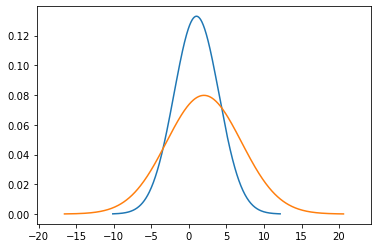

In [5]:
x.describe()
y.describe()
x.plot()
y.plot()
print(x.tag)

In [6]:
z = x + y

MCERP Uncertain Value:
 > Mean...................  2.999862569263015
 > Variance...............  34.10186830639778
 > Skewness Coefficient...  0.0059128626890191886
 > Kurtosis Coefficient...  2.958918973851492



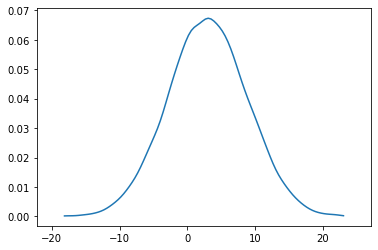

In [7]:
z.describe()
z.plot()

In [10]:
print(2*z)
print(z*2)
print(2**z)
print(z**2)
print(2/z)
print(z/2)
#print(2//z)
#print(z//2)

uv(5.99972513852603, 136.40747322559113, 0.0059128626890191886, 2.958918973851492)
uv(5.99972513852603, 136.40747322559113, 0.0059128626890191886, 2.958918973851492)
uv(9287.485395551605, 25040029987.79347, 32.32047241651918, 1285.9505848791819)
uv(43.101043740863076, 3519.7844507671025, 2.5625106756904414, 11.969798860305248)
uv(0.08567828980334755, 823.2148031361718, 6.9599322147984655, 2198.795037834627)
uv(1.4999312846315076, 8.525467076599446, 0.0059128626890191886, 2.958918973851492)


# Support with physipy

In [11]:
import physipy 
from physipy import m, cd, s, Quantity, Dimension

## Construction

In [12]:
x = Quantity(mcerp.Normal(1, 2), Dimension("L"))
x

<Quantity : uv(1.0000121696141264, 3.9994859478080205, 0.00020060008072057947, 2.9951578412568596) m>

In [15]:
# using multiplication
# x = mcerp.Normal(1, 2)*s : NotUpcast: <class 'physipy.quantity.quantity.Quantity'> cannot be converted to a number with uncertainty
x = m *mcerp.Normal(1, 2)
x

<Quantity : uv(1.0000634510240713, 4.000051666823731, 0.0016527381886304279, 3.000806502378941) m, symbol=UndefinedSymbol*m>

## Basic Operation

In [16]:
# with scalar
scalar = 2*m
print(x+scalar)
print(x-scalar)
print(x*scalar)
print(x/scalar)
# print(x**s) : NotUpcast: <class 'physipy.quantity.quantity.Quantity'> cannot be converted to a number with uncertainty

print(scalar+x)
print(scalar-x)
print(scalar*x)
print(scalar/x)
# print(x**s) : NotUpcast: <class 'physipy.quantity.quantity.Quantity'> cannot be converted to a number with uncertainty

uv(3.000063451024072, 4.000051666823731, 0.0016527381886297066, 3.000806502378941) m
uv(-0.9999365489759285, 4.000051666823731, 0.0016527381886304196, 3.000806502378941) m
uv(2.0001269020481427, 16.000206667294925, 0.0016527381886304279, 3.000806502378941) m**2
uv(0.5000317255120357, 1.0000129167059328, 0.0016527381886304279, 3.000806502378941)
uv(3.000063451024072, 4.000051666823731, 0.0016527381886297066, 3.000806502378941) m
uv(0.9999365489759285, 4.000051666823731, -0.0016527381886304196, 3.000806502378941) m
uv(2.0001269020481427, 16.000206667294925, 0.0016527381886304279, 3.000806502378941) m**2
uv(1.9223740530338855, 25784.318924469815, 82.03981663218285, 8027.856869461848)


In [17]:
# with other uv
x = Quantity(mcerp.Normal(1, 2), Dimension("L"))
y = Quantity(mcerp.Normal(1, 2), Dimension("L"))

print(x+y)
print(x-y)
print(x*y)
print(x/y)
# print(x**y) : NotUpcast: <class 'physipy.quantity.quantity.Quantity'> cannot be converted to a number with uncertainty

print(y+x)
print(y-x)
print(y*x)
print(y/x)
# print(y**x) : NotUpcast: <class 'physipy.quantity.quantity.Quantity'> cannot be converted to a number with uncertainty

uv(2.000199363300275, 8.100938080378933, -0.014437055552896682, 2.9926457909128406) m
uv(0.0001741557697448594, 7.903706159402858, 0.006790835663392556, 3.0756432072085307) m
uv(1.0495073458981674, 24.174368397356087, 0.6784564436103765, 8.932873334598431) m**2
uv(-1.4626983719552784, 14615.310067529854, -70.59347483813661, 6260.264863793744)
uv(2.000199363300275, 8.100938080378933, -0.014437055552896682, 2.9926457909128406) m
uv(-0.0001741557697448594, 7.903706159402858, -0.006790835663392556, 3.0756432072085307) m
uv(1.0495073458981674, 24.174368397356087, 0.6784564436103765, 8.932873334598431) m**2
uv(0.07249921296597671, 2238.6730644623185, -11.862463285220931, 1042.707803383693)


# Functionnalities
Use `q.value.` to acces mcerp attributes

In [18]:
x.value.describe()
x.value.skew
print(x.value.stats)

MCERP Uncertain Value:
 > Mean...................  1.00018675953501
 > Variance...............  4.002435673612182
 > Skewness Coefficient...  0.004607871975121705
 > Kurtosis Coefficient...  3.0187298107228777

[1.00018675953501, 4.002435673612182, 0.004607871975121705, 3.0187298107228777]


# Examples

In [19]:
from mcerp import N, U, Gamma, Beta, Exp, H

In [20]:
x1 = m * N(24, 1)
x2 = m * N(37, 4)
x3 = s * Exp(2)

In [21]:
# x1.mean
print("x1.mean")
print(x1.mean) # falls back on UV value, hence drops the unit
# x1.mean() : fails because relies on numpy.mean

# x1.var
print("x1.var")
print(x1.var) # falls back on UV value, hence drops the nit

# x1.skew
print("x1.skew")
print(x1.skew) # falls back on UV value, hence drops the nit

# x1.kurt
print("x1.kurt")
print(x1.kurt)

# x1.stats
print("x1.stats")
print(x1.stats)

# Z = (x1*x2**2)/(15*(1.5 + x3))
Z = (x1*x2**2)/(15*(1.5*s + x3))
print(Z)

# Z.describe()
Z.describe()

x1.mean
<bound method Quantity.mean of <Quantity : uv(24.000007131232152, 0.9997756005038061, 0.00037611454508711594, 2.994095619987853) m, symbol=UndefinedSymbol*m>>
x1.var
0.9997756005038061
x1.skew
0.00037611454508711594
x1.kurt
2.994095619987853
x1.stats
[24.000007131232152, 0.9997756005038061, 0.00037611454508711594, 2.994095619987853]
uv(580.9396018400225, 29493.876598567356, 0.368455249563021, 3.0772403740569194) m**2
MCERP Uncertain Value:
 > Mean...................  580.9396018400225
 > Variance...............  29493.876598567356
 > Skewness Coefficient...  0.368455249563021
 > Kurtosis Coefficient...  3.0772403740569194



# Distributions

In [22]:
mu = 1
sigma = 0.1
x = s * mcerp.Normal(mu, sigma)

In [23]:
# y = mcerp.Normal(mu*s, sigma*s) # fails because "assert sigma > 0, "

In [24]:
import scipy.stats as ss
x = s * mcerp.uv(ss.norm(loc=10, scale=1))
x

<Quantity : uv(20.00003913084798, 3.999883249949486, 0.00065459916519459, 2.998102813774616) m, symbol=UndefinedSymbol**2*m>

In [25]:
distrib = ss.norm(loc=10*s, scale=1*s)
distrib.mean() # unit is stripped, not mcerp's fault

/Users/mocquin/MYLIB10/MODULES/physipy/physipy/quantity/quantity.py:681: UserWarning: The unit of the quantity is stripped for __array_struct__
  warnings.warn(f"The unit of the quantity is stripped for {item}")


20.0

In [26]:
y = mcerp.uv(distrib)
y

uv(19.999958535298983, 4.001556807516543, -0.0010996604728435466, 3.0103779597478106)

# Plotting

In [27]:
# x1.plot() : fails because uses Quantity.plot, which doesn't handle mcerp

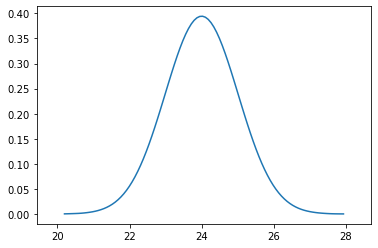

In [28]:
x1.value.plot()

AttributeError: 'Polygon' object has no property 'normed'

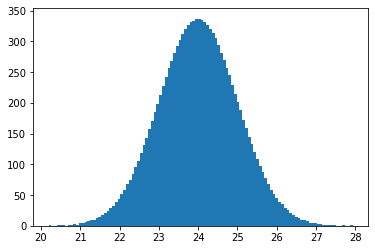

In [29]:
# fails because of matploltib version on normed 
x1.value.plot(hist=True)

In [30]:
rvs1 = m*N(5, 10)
rvs2 = m*N(5, 10) + m*N(0, 0.2)
rvs3 = m*N(8, 10) + m*N(0, 0.2)

In [31]:
from scipy.stats import ttest_rel
tstat, pval = ttest_rel(rvs1._mcpts, rvs2._mcpts)
pval

0.9993627525674531

In [32]:
rvs1<rvs2

False

In [33]:
tstat, pval = ttest_rel(rvs1._mcpts, rvs3._mcpts)
pval

4.891682263467929e-118

In [34]:
float(tstat)

-23.357255825963

In [35]:
rvs1<rvs3

True

In [36]:
x = N(0, 1)
y = N(0, 10)
x<y

False

In [37]:
x>y

False

In [38]:
x==y

False

In [39]:
x1==x1

True

In [40]:
n1 = s*N(0, 1)
n2 = s*N(0, 1)
n1==n2

False

In [41]:
print(Z*Z)
print(Z**2)
Z*Z == Z**2

uv(366984.6975846111, 45959459663.40255, 1.229883560795501, 5.468647896649558) m**4
uv(366984.6975846111, 45959459663.40255, 1.229883560795501, 5.468647896649558) m**4


False

In [42]:
h = s*H(50, 5, 10)
h==4

False

In [43]:
h<=3*s

TypeError: unsupported operand type(s) for |: 'float' and 'float'

In [44]:
n = s*N(0, 1)
n==0*s

0.0

In [45]:
n==0.5*s

0.0

In [46]:
n==1.2345*s

0.0